# Projeto - Previsão da Resistência do Concreto em Determinada Idade

---

# Etapa 1 - Entendimento do negócio

O concreto é um dos materiais mais importantes e amplamente utilizados na construção civil em todo o mundo. Ele é formado por uma mistura de cimento, água, agregados (graúdos e finos) e, em algumas composições, aditivos químicos. 

Sua popularidade na construção se deve à sua versatilidade, resistência e durabilidade, sendo empregado em diversas estruturas, como pontes, edifícios, barragens e pavimentos.

 #### Importância do Concreto na Construção Civil
- Estruturas Resistentes: O concreto proporciona alta resistência à compressão, sendo essencial em estruturas que suportam grandes cargas.
- Durabilidade: Quando corretamente formulado, o concreto pode resistir a condições adversas, como intempéries, cargas dinâmicas e químicos agressivos.
- Custo-Benefício: Comparado a outros materiais de construção, o concreto oferece uma excelente relação custo-benefício.

#### Por Que Medir a Resistência do Concreto?
A resistência à compressão é a principal propriedade mecânica do concreto e um parâmetro crítico na engenharia estrutural. Ela determina se o material é capaz de suportar as cargas projetadas sem falhar.

A resistência é influenciada por diversos fatores:

- Composição da Mistura: Proporções de cimento, água, agregados e aditivos.
- Tempo de Cura: A resistência do concreto aumenta com o tempo devido às reações químicas de hidratação do cimento.
- Condições Ambientais: Temperatura e umidade podem afetar o processo de cura. Esta variável será desconsiderada para o estudo uma vez que os valores obtidos no dataset são provenientes de testes em laboratório.

#### Objetivo do Projeto
O objetivo é criar um modelo preditivo capaz de determinar a resistência à compressão do concreto, medida em megapascais (MPa), ao longo de sua idade, variando de 1 a 365 dias. Isso permitirá:

- Formular misturas mais eficientes.
- Reduzir custos e desperdícios.
- Garantir a segurança e a qualidade de estruturas construídas.
- Determinar as quantidades ideais de cada componente da mistura, considerando sua disponibilidade, para encontrar a proporção que maximize a resistência do concreto ou atinja a resistência desejada no menor tempo possível.

---

# Etapa 2 - Entendimento dos dados

- #### Fonte de onde foi retirada a base de dados

Esta base de dados foi retirada do site *https://archive.ics.uci.edu/* que disponibiliza varios datasets para estudo.

- #### Entendimento da estrutura

A resistência à compressão do concreto (MPa) para uma mistura específica, em uma idade definida (dias), foi determinada em laboratório. Os dados estão em formato bruto (não escalonados).

- #### Dicionário de dados

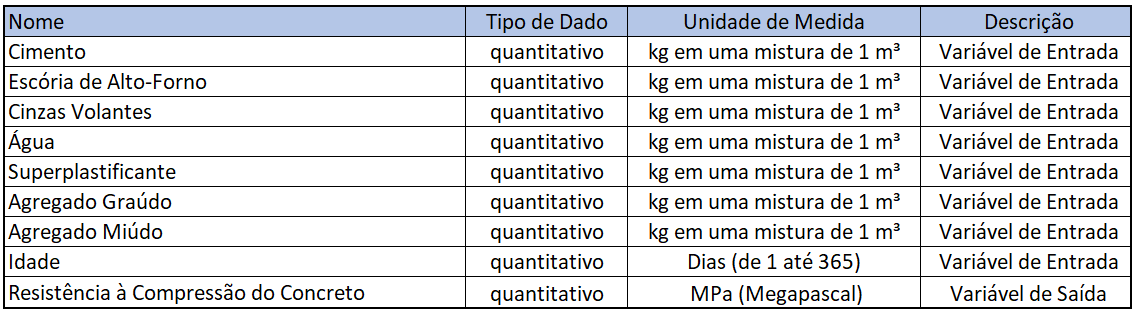

**Agora que já estamos contextualizados sobre o projeto e a estrutura do nosso dataset, vamos então carregar nossa base neste notebook.**

- #### Carregando os pacotes

Vamos carregar aqui as bibliotecas e pacotes necessários para que possamos trabalhar neste projeto:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


- #### Carregando os dados

Agora com as bibliotecas necessárias podemos trazer nosso dataset que está em formato *xlsx* para o nosso ambiente jupyter notebook:

In [2]:
#usando o pandas para ler um arquivo excel
df = pd.read_excel('Dataset/Concrete_Data.xls')

# conferindo o resultado
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# conferindo o numero de linhas e colunas do dataframe:
df.shape

(1030, 9)

Para facilitar os estudos, vamos trocar os nomes destas variáveis por nomes menos complexos. Assim conseguiremos mais agilidade ao manipular as variáveis e retirar informações convenientes:

In [4]:
# criando nova lista para as variaveis
nomes_colunas = ['cimento', 'esc_alt_forno', 'cinzas_volantes', 'agua', 'superplastificante', 'agr_graudo', 'agr_miudo', 'idade', 'resistencia']

# aplicando os nomes às colunas
df.columns = nomes_colunas

# conferindo resultado
df.head()

,cimento,esc_alt_forno,cinzas_volantes,agua,superplastificante,agr_graudo,agr_miudo,idade,resistencia
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


- #### Entendimento dos dados

Primeiro vamos dar um overview geral nestes dados:

In [5]:
# usando o describe para tentarmos extrair algumas metricas
df.describe()

,cimento,esc_alt_forno,cinzas_volantes,agua,superplastificante,agr_graudo,agr_miudo,idade,resistencia
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


À primeira vista o que vemos é que não temos dados faltantes em nossa base pois a contagem é a mesma em todo dataframe.

Esta característica ja é muito boa para nosso estudo pois despensa o trabalho de descobrirmos o que fazer com missings na base.

In [6]:
# conferindo se o describe diz a verdade
df.isna().sum()

cimento               0
esc_alt_forno         0
cinzas_volantes       0
agua                  0
superplastificante    0
agr_graudo            0
agr_miudo             0
idade                 0
resistencia           0
dtype: int64

- #### Análise Univariada

Como nossa base é inteiramente numérica sem nenhum tipo de variável qualitativa/categórica, nossa analise das variáveis pode ser feita da seguinte forma:

Vamos fazer uma análise de distribuição através de um histograma para vermos como os valores de cada variável está distribuída na base.

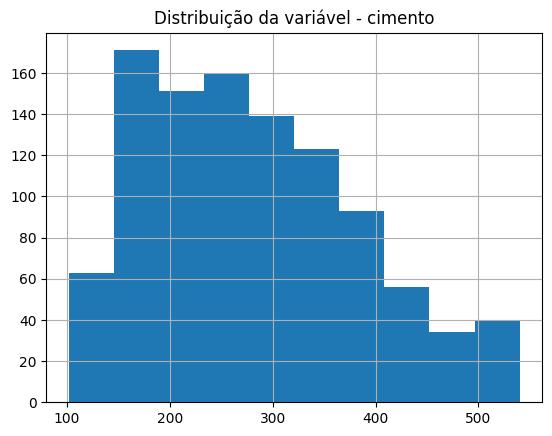

In [7]:
# Histograma para o cimento
df['cimento'].hist(bins=10)
plt.title('Distribuição da variável - cimento')
plt.show()

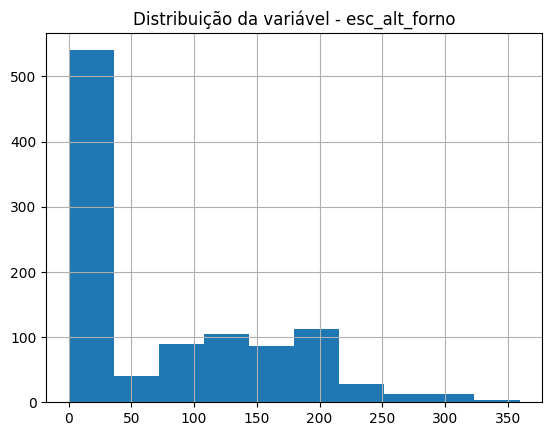

In [8]:
# Histograma para a escória de alto forno
df['esc_alt_forno'].hist(bins=10)
plt.title('Distribuição da variável - esc_alt_forno')
plt.show()

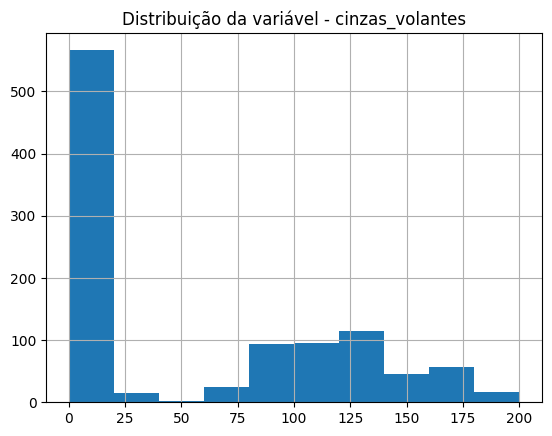

In [9]:
# Histograma para as cinzas volantes
df['cinzas_volantes'].hist(bins=10)
plt.title('Distribuição da variável - cinzas_volantes')
plt.show()

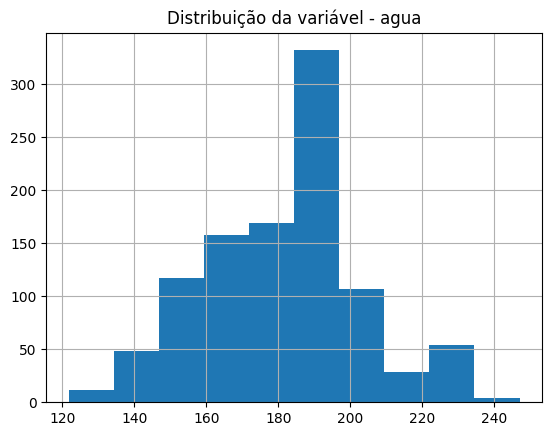

In [10]:
# Histograma para a agua
df['agua'].hist(bins=10)
plt.title('Distribuição da variável - agua')
plt.show()

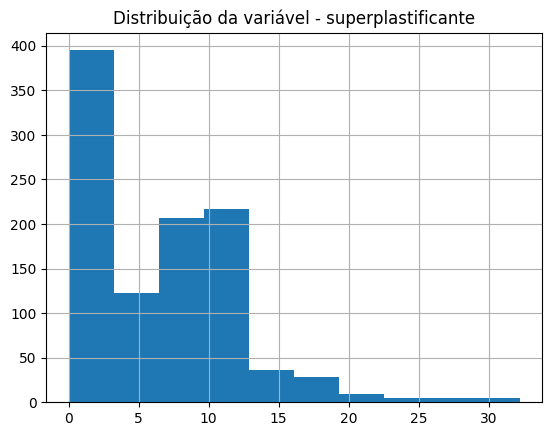

In [11]:
# Histograma para o superplastificante
df['superplastificante'].hist(bins=10)
plt.title('Distribuição da variável - superplastificante')
plt.show()

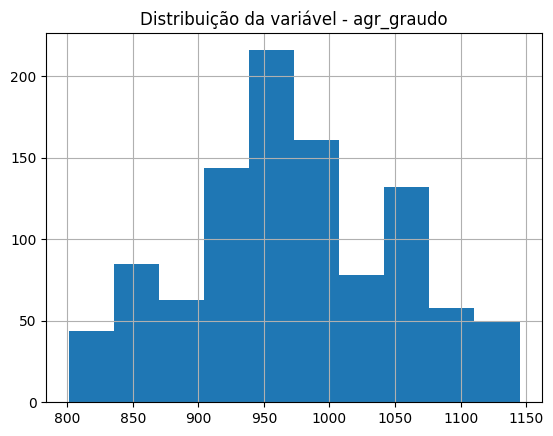

In [12]:
# Histograma para o agregado graúdo
df['agr_graudo'].hist(bins=10)
plt.title('Distribuição da variável - agr_graudo')
plt.show()

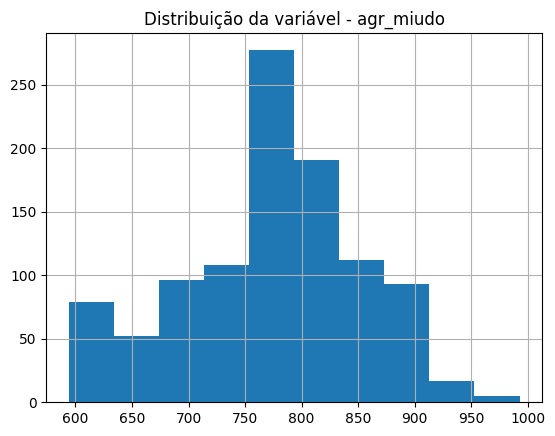

In [13]:
# Histograma para o agregado miúdo
df['agr_miudo'].hist(bins=10)
plt.title('Distribuição da variável - agr_miudo')
plt.show()

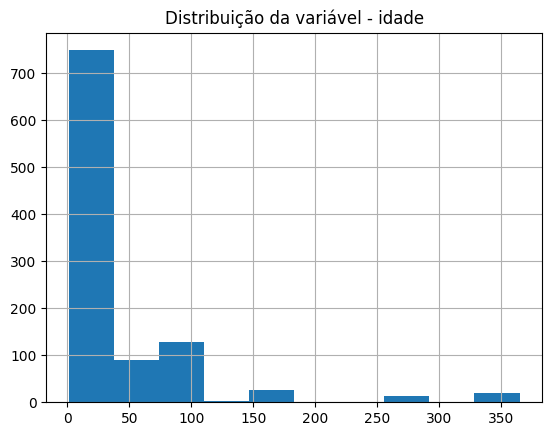

In [14]:
# Histograma para  a idade do concreto
df['idade'].hist(bins=10)
plt.title('Distribuição da variável - idade')
plt.show()

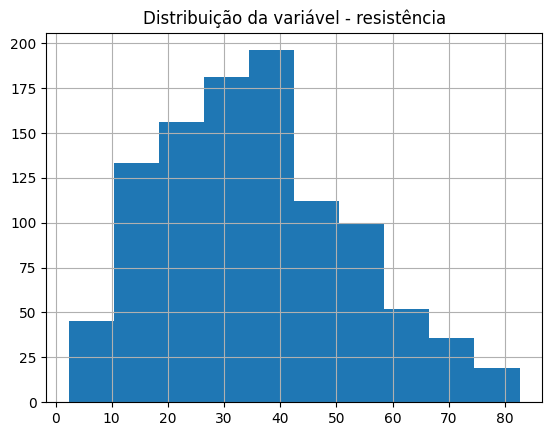

In [15]:
# Histograma para a resistência do concreto
df['resistencia'].hist(bins=10)
plt.title('Distribuição da variável - resistência')
plt.show()

#### Percepções

Conseguimos ver que no geral as misturas da base levam menos escória de alto forno e cinzas volantes;

Não se costuma usar mais do que 12kg/m³ de superplastificante;

A maioria dos testes de compressão ocorreram quando o concreto tinha de 0 a 100 dias de vida;

A distribuição da resistência do concreto na base está assumindo um formato de sino o que é bom pois indica normalidade na distribuição da variável alvo.

 - #### Análise Bivariada

Vamos agora fazer uma análise bivariada e descobrir como cada caracteristica esplicativa se comporta frente à nossa target.

Para isso vamo usar um grafico de dispersão a fim de visualizarmos padróes e possíveis outliers que poderemos tratar mais pra frente.

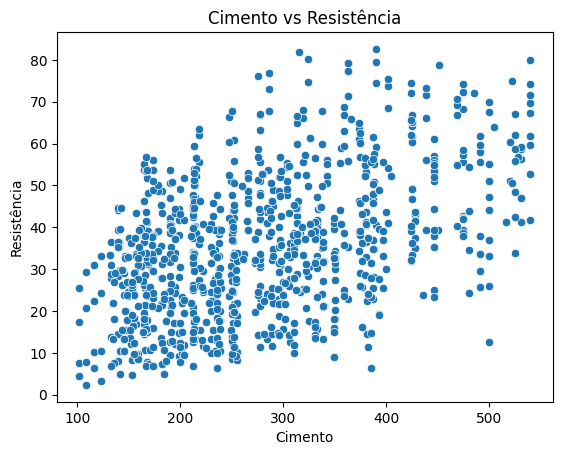

In [16]:
# Gráfico de dispersão entre 'cimento' e 'resistencia'
sns.scatterplot(x=df['cimento'], y=df['resistencia'])
plt.title("Cimento vs Resistência")
plt.xlabel("Cimento")
plt.ylabel("Resistência")
plt.show()

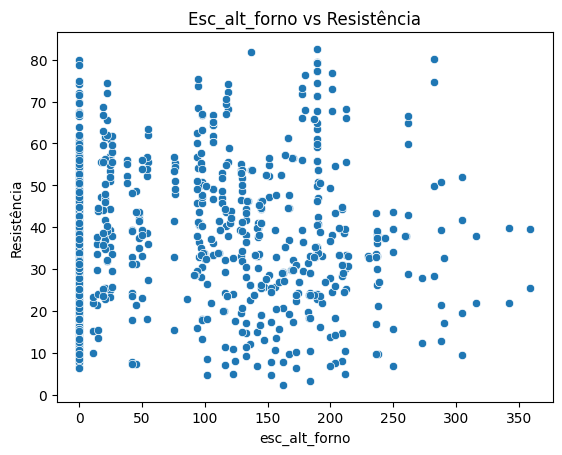

In [17]:
# Gráfico de dispersão entre 'esc_alt_forno' e 'resistencia'
sns.scatterplot(x=df['esc_alt_forno'], y=df['resistencia'])
plt.title("Esc_alt_forno vs Resistência")
plt.xlabel("esc_alt_forno")
plt.ylabel("Resistência")
plt.show()

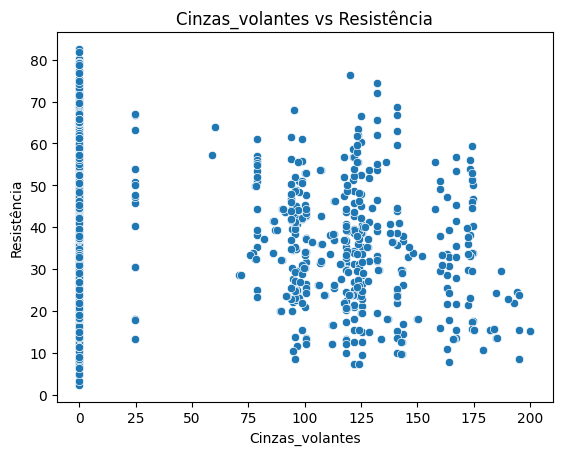

In [18]:
# Gráfico de dispersão entre 'cinzas_volantes' e 'resistencia'
sns.scatterplot(x=df['cinzas_volantes'], y=df['resistencia'])
plt.title("Cinzas_volantes vs Resistência")
plt.xlabel("Cinzas_volantes")
plt.ylabel("Resistência")
plt.show()

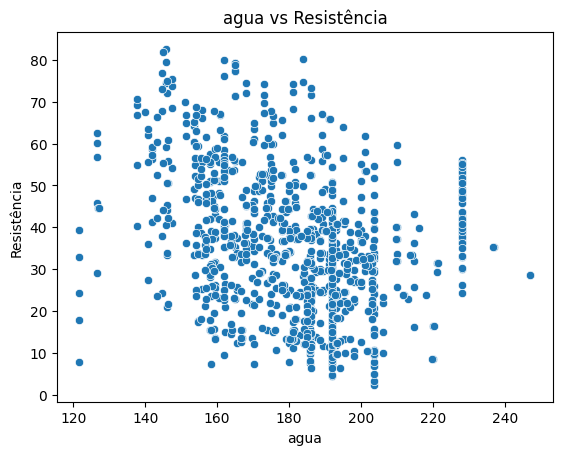

In [19]:
# Gráfico de dispersão entre 'agua' e 'resistencia'
sns.scatterplot(x=df['agua'], y=df['resistencia'])
plt.title("agua vs Resistência")
plt.xlabel("agua")
plt.ylabel("Resistência")
plt.show()

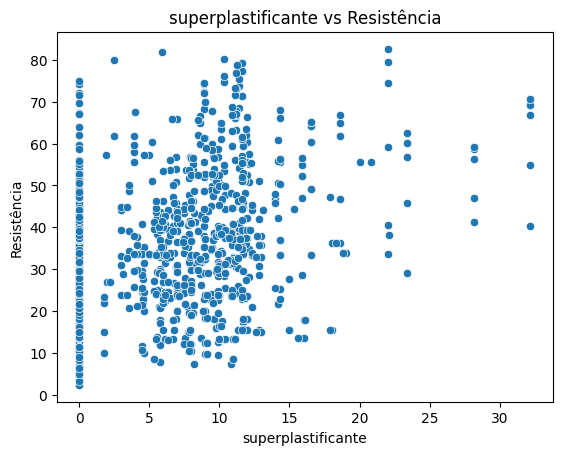

In [20]:
# Gráfico de dispersão entre 'superplastificante' e 'resistencia'
sns.scatterplot(x=df['superplastificante'], y=df['resistencia'])
plt.title("superplastificante vs Resistência")
plt.xlabel("superplastificante")
plt.ylabel("Resistência")
plt.show()

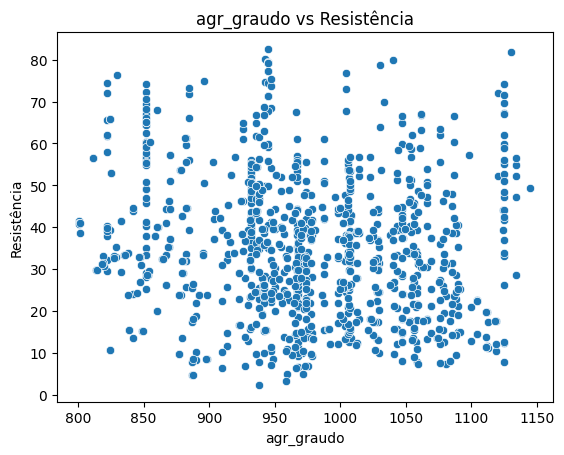

In [21]:
# Gráfico de dispersão entre 'agregado graúdo' e 'resistencia'
sns.scatterplot(x=df['agr_graudo'], y=df['resistencia'])
plt.title("agr_graudo vs Resistência")
plt.xlabel("agr_graudo")
plt.ylabel("Resistência")
plt.show()

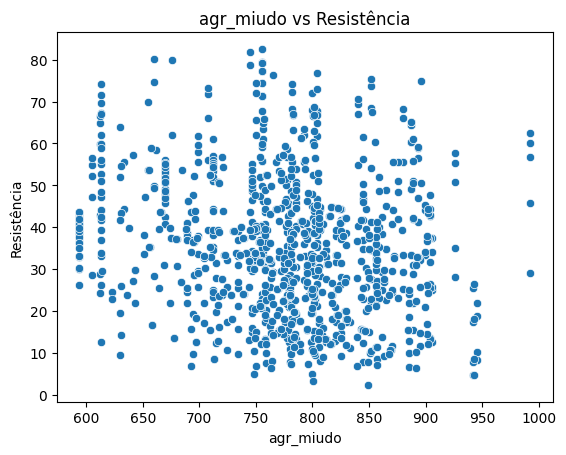

In [22]:
# Gráfico de dispersão entre 'agr_miudo' e 'resistencia'
sns.scatterplot(x=df['agr_miudo'], y=df['resistencia'])
plt.title("agr_miudo vs Resistência")
plt.xlabel("agr_miudo")
plt.ylabel("Resistência")
plt.show()

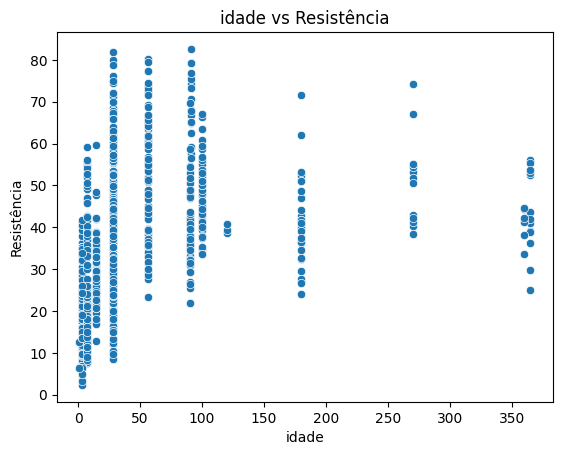

In [23]:
# Gráfico de dispersão entre 'idade' e 'resistencia'
sns.scatterplot(x=df['idade'], y=df['resistencia'])
plt.title("idade vs Resistência")
plt.xlabel("idade")
plt.ylabel("Resistência")
plt.show()

#### Percepções

Pudemos observar que nenhuma variável explicativa sozinha possui uma correlação direta com nossa variável resposta.

Vamos tentar observar uma tabela de correlação a fim de vermos melhor como as variáveis estão se comportando entre si:

In [24]:
# aplicando o corr para ver as correlações entre variáveis
df.corr()

,cimento,esc_alt_forno,cinzas_volantes,agua,superplastificante,agr_graudo,agr_miudo,idade,resistencia
cimento,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
esc_alt_forno,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
cinzas_volantes,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
agua,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplastificante,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
agr_graudo,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
agr_miudo,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
idade,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
resistencia,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


Aqui podemos ver que as correlações mais fortes para a resistência do concreto são com as variáveis 'cimento', 'agua', 'superplastificante' e 'idade'

As demais apresentam uma correlação não muito forte. Além disso é possivel ver uma correlação muito forte entre as variáveis explicativas 'agua' X'superplastificante' e 'agua' X 'agregado muído'. Caso optarmos por produzir um modelo de regressão, teremos que nos preocupar com a multicolinearidade entre estas variáveis.

Veremos também qual outro método poderiamos usar para resolver o problema mais a frente.

---

# Etapa 3 - Preparação dos dados

Nesta etapa faremos os ajustes que forem necessários em nossa base para podermos seguir com o desenvolvimento do modelo mais à frente.

- #### Tipos de variáveis

Primeiro vamos verificar quais são os tipos de dados que temos na base e se eles estão sendo lidos realmente como numéricos pelo python:

In [25]:
# conferindo informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cimento             1030 non-null   float64
 1   esc_alt_forno       1030 non-null   float64
 2   cinzas_volantes     1030 non-null   float64
 3   agua                1030 non-null   float64
 4   superplastificante  1030 non-null   float64
 5   agr_graudo          1030 non-null   float64
 6   agr_miudo           1030 non-null   float64
 7   idade               1030 non-null   int64  
 8   resistencia         1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


Vemos que todas variáveis estão sendo corretamente lidas como numéricas e de quebra também reforçamos o fato de não termos missings na base.

- #### Identificando outliers

Devemos lembrar que estamos lhe dando com um problema de regressão. E nestes casos um passo importantissimo para garantir a eficácia do modelo é remover os outliers da base.

Existem várias técnicas que são usadas para identificarmos os outliers em um dataset.

Nós ja plotamos diversos gráficos de histograma e dispersão e já tivemos uma ideia de como os dados estão apresentando uma certa deslinearização.

Ao plotar também boxplots das variáveis explicativas, costumamos ver como estão dispostos os valores que fogem muito à normalidade dos demais.


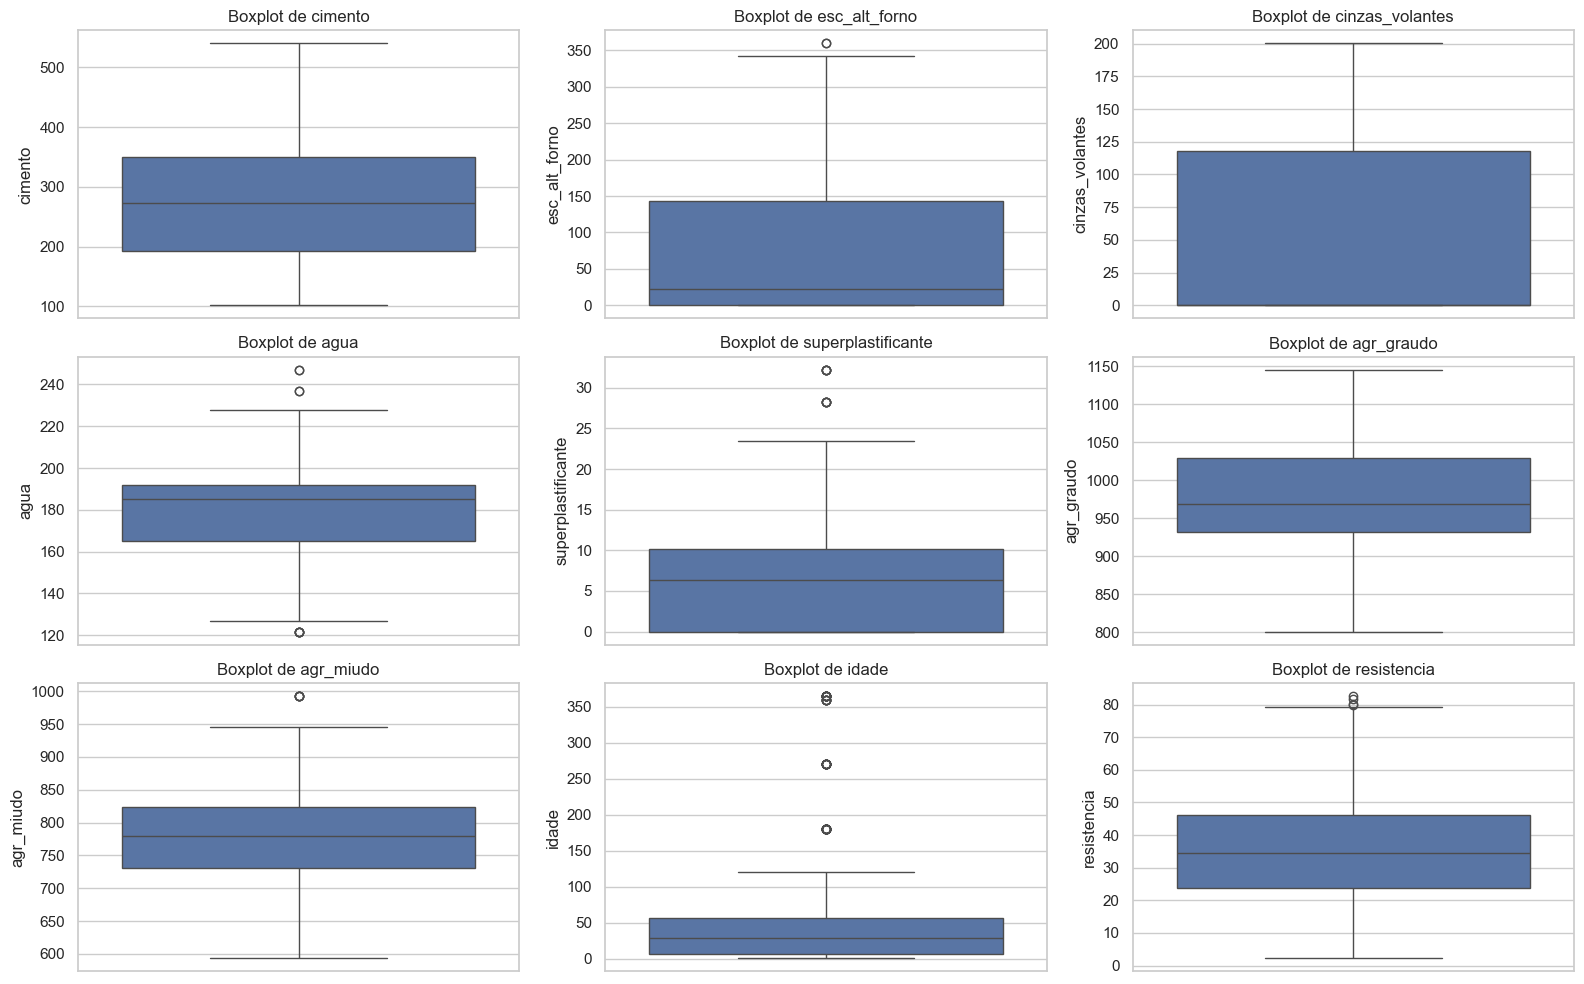

In [26]:
# Visualização dos outliers com Boxplots

# usando seaborn em grade para plotar os boxplots das variáveis
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
    plt.tight_layout()

plt.show()

#### Percepções

Nos gráficos de boxplots, temos a noção de outliers quando existem dados que fogem do bigode dos gráficos.

Segundo os gráficos acima, temos outliers nas variáveis: 'escória de alto forno', 'agua', 'superplastificante', 'agregado miúdo', 'idade' e 'resistência'.

Vamos agora investigar os valores fora da normalidade com outra técnica que consiste em identificar dados que fogem dos intervalos de interquartil.

In [27]:
# Detectando outliers usando o IQR (intervalo interquartil

# o primeiro quartil é o valor abaixo do qual 25% dos dados estão localizados.
Q1 = df.quantile(0.25)

# o terceiro quartil é o valor abaixo do qual 75% dos dados estão localizados.
Q3 = df.quantile(0.75)

# o intervalo interquartil (IQR) é a região onde estão os dados do terceiro quartil com exceção dos dados do primeiro
IQR = Q3 - Q1

In [28]:
# Identificando onde há outliers

# armazenando em um objeto os dados que se encontram além dos limites dos interquartis com uma margem de tolerancia igual a 1,5 X IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# armazenando em outro objeto uma sumarização das variáveis que têm outliers e quantos são para cada uma delas
outlier_summary = outliers.sum()

# conferindo os outliers
outlier_summary

cimento                0
esc_alt_forno          2
cinzas_volantes        0
agua                   9
superplastificante    10
agr_graudo             0
agr_miudo              5
idade                 59
resistencia            4
dtype: int64

Veja que temos um número bom de outliers em uma base relativamente pequena.

Resta saber se cada outlier corresponde a uma observação isolada ou se uma observação pode ter mais de um outlier.

Em resumo, precisamos saber quais são as observações que contém os valores encontrados acima

In [29]:
#Exibindo os dados onde há outliers

# armazenando num objeto todas observações que existem dentro do objeto outliers
data_outliers = df[outliers.any(axis=1)]

# criando um dataframe do pandas para trazer as observações à tona
df_outliers = pd.DataFrame(data_outliers)

# conferindo o resultado
df_outliers

,cimento,esc_alt_forno,cinzas_volantes,agua,superplastificante,agr_graudo,agr_miudo,idade,resistencia
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
...,...,...,...,...,...,...,...,...,...
823,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.585415
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.225329
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.627044
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.629801


Encontramos o df que possui somente outliers.

No objeto de sumarização feito acima 'outlier_summary' tinhamos 89 observações se somarmos todo o sumário.

E ao observar o dataframe acima vimos que de fato cada valor que foge à normalidade se encontra em uma observação isolada.

Precisamos nos livrar destas observações para termos um dataframe livre de valores que possam prejudicar a eficácia do nosso modelo de regressão.

In [30]:
# criando um novo dataframe que possuirá as observações cujos outliers são ausentes
df_concreto = df.drop(df_outliers.index)

# resetando os indexes do dataframe
df_concreto.reset_index(inplace=True)

# conferindo o resultado e dropando o index do dataframe
df_concreto.drop(columns = 'index', inplace = True)

df_concreto

,cimento,esc_alt_forno,cinzas_volantes,agua,superplastificante,agr_graudo,agr_miudo,idade,resistencia
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
1,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
2,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
4,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790
...,...,...,...,...,...,...,...,...,...
936,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
937,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
938,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
939,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


Pronto. Agora temos um dataframe livre de outliers e pronto para a próxima etapa que é a escolha do método de predição e a modelagem do mesmo.



---

# Etapa 4 - Modelagem

Nesta etapa realizaremos a escolha do método de previsão para a resistência do concreto.

Em seguida iremos modelar esta solução para a resolução do nosso problema.

- #### Dividindo a base em treino e teste

Antes de mais nada para testarmos alguns metodos estatisticos de de machine learning vamos agora dividir nossa base já tratada em dados que serão usados para treinar o modelo e dados que serão usados para testar o modelo:

In [31]:
# vamos determinar o que é o nosso X (variáveis explicativas) e o que é nosso y (target)

# variáveis explicativas
X = df_concreto.drop(columns = 'resistencia')

# variável alvo (target) y
y = df_concreto['resistencia']

In [32]:
# conferindo nosso X
X.head()

,cimento,esc_alt_forno,cinzas_volantes,agua,superplastificante,agr_graudo,agr_miudo,idade
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
1,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
2,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


In [33]:
# conferindo nosso y
y.head()

0    61.887366
1    47.029847
2    36.447770
3    45.854291
4    39.289790
Name: resistencia, dtype: float64

In [34]:
# aplicando o train_test_split para realizar a divisão, sendo que 30% dos dados serão separados para teste e o restante para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 369)

Conferindo os shapes:

In [35]:
X_train.shape

(658, 8)

In [36]:
X_test.shape

(283, 8)

In [37]:
y_train.shape

(658,)

In [38]:
y_test.shape

(283,)

Agora que nossa base está devidamente distribuída, vamos testar alguns métodos de previsão da variabilidade dos dados e ver qual deles se sai melhor.

- ### Selecionando as escolhas de métodos de acordo com a análise exploratória

Conforme vimos na fase de análise exploratória, pudemos ver que as variáveis explicativas da nossa base não assumem uma relação linear com a nossa target.

Sendo assim, adotar soluções como regressão linear não pode ser vista como eficiente uma vez que este tipo de modelo funciona melhor quando existe linearidade entre variaveis explivativas e a target.

Por este motivo, precisamos adotar metodos que sejam capazes de capturar e interpretar padrões mais complexos nos dados. Metodos bons em realizar esta tarefa são chamados de modelos não lineares.

Para este estudo vamos selecionar dois metodos não lineares para testarmos a eficacia deles a fim de escolhermos um deles para seguirmos com a modelagem.


- ### Opção 01 - Random Forest Regressor

O Random Forest é um método explicado como um conjunto de árvores simples. Ele é mais complexo do que o DecisionTreeRegressor, contudo o RandomForestRegressor possui menos propensão em causar overfitting nos dados.

Vamos testar esta primeira opção e ver como ela se sai:

#### Treinando o modelo

In [39]:
# vamos chamar este modelo de rf_model (random forest model) e vamos armazenar nesta variavel a calculadora do ramdom forest
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 369)

# agora vamos treinar este modelo com os dados de teste
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=369)

#### Avaliando o modelo

In [40]:
# com o modelo treinado com os dados de treino vamos agora colocá-lo à prova apresentando a ele os dados de teste

# criando as previsões
y_prev = rf_model.predict(X_test)

# com as previsões feitas, vamos agora avaliar as métricas do modelo

# erro absoluto médio
mae = mean_absolute_error(y_test, y_prev)

# raiz do erro quadratico médio
rmse = np.sqrt(mean_squared_error(y_test, y_prev))

# coeficiente de determinação
r2 = r2_score(y_test, y_prev)

# output para nos explicar as métricas do modelo
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 3.6699112201605497
RMSE: 4.932805174017854
R²: 0.9064604001403305


#### Conclusão inicial do RandomForestClassifier

Vê-se que o modelo sem tunning é capaz de explicar cerca de 90% da variabilidade dos dados.

Vamos parar por aqui e agora vamos testar nossa segunda opção de modelo a fim de verificarmos qual das opções será melhor para trabalhar o tunning.

---

- ### Opção 02 - Gradient Boosting Regressor

O GradientBoostingRegressor é um modelo de regressão baseado em árvores de decisão que utiliza o boosting para melhorar a precisão, corrigindo erros das previsões anteriores. Ele é eficaz em capturar padrões complexos e não lineares em datasets.

Vamos verificar como este modelo se sai com nosso dataset:

#### Treinando o modelo

In [41]:
# vamos chamar este modelo de gbr_model (gradient boosting regressor) e vamos armazenar nesta variavel a calculadora do gradient boosting regressor
gbr_model = GradientBoostingRegressor(random_state = 369)

# agora vamos treinar este modelo com os dados de teste
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=369)

#### Avaliando o modelo

In [42]:
# com o modelo treinado com os dados de treino vamos agora colocá-lo à prova apresentando a ele os dados de teste

y_prev = gbr_model.predict(X_test)

# com as previsões feitas, vamos agora avaliar as métricas do modelo

# Métricas de avaliação

# erro absoluto médio
mae = mean_absolute_error(y_test, y_prev)

# raiz do erro quadratico médio
rmse = np.sqrt(mean_squared_error(y_test, y_prev))

# coeficiente de determinação
r2 = r2_score(y_test, y_prev)

# output para nos explicar as métricas do modelo
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 3.607934885042426
RMSE: 4.747493137543068
R²: 0.913356442992866


#### Conclusão inicial do GradientBoostingRegressor

Vê-se que o modelo sem tunning é capaz de explicar cerca de 91,33% da variabilidade dos dados.

Vamos parar por aqui e agora vamoestudar qual das duas opções devemos escolher para seguir em frente com o tunning.



---

- ### Escolhendo o método

Vimos que dentre as duas opções que estudamos acima, a que se saiu melhor foi a opção 02.

Sendo assim vamos trabalhar encima do método **GradientBoostingRegressor** para realizarmos a tunagem deste modelo a fim de melhorarmos suas métricas ainda mais a fim de termos um modelo que consiga explicar o máximo possível a variabilidade dos dados.

---

- ### Retomando a opção 02 - GradienteBoostingRegressor

Vamos retomar de onde paramos com a opção 02, recolocando abaixo o que ja fizemos e resultados que obtivemos.

In [84]:
# vamos chamar este modelo de gbr_model (gradient boosting regressor) e vamos armazenar nesta variavel a calculadora do gradient boosting regressor
gbr_model = GradientBoostingRegressor(random_state = 369)

# agora vamos treinar este modelo com os dados de teste
gbr_model.fit(X_train,y_train)

# com o modelo treinado com os dados de treino vamos agora colocá-lo à prova apresentando a ele os dados de teste

y_prev = gbr_model.predict(X_test)

# com as previsões feitas, vamos agora avaliar as métricas do modelo

# Métricas de avaliação

# erro absoluto médio
mae = mean_absolute_error(y_test, y_prev)

# raiz do erro quadratico médio
rmse = np.sqrt(mean_squared_error(y_test, y_prev))

# coeficiente de determinação
r2 = r2_score(y_test, y_prev)

# output para nos explicar as métricas do modelo
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 3.607934885042426
RMSE: 4.747493137543068
R²: 0.913356442992866


Nesta fase, vamos tentar realizar um melhoramento neste algoritimo a fim de conseguirmos melhores métricas. 

A este ato, damos o nome de *Tunning*

O GradientBoostingRegressor possui diversos hiperparâmetros que podem ser ajustados para melhorar o desempenho. 

Usaremos uma ferramenta chamada GridSearchCV que realizará uma espécie de varredura em grid, de todos os intervelos de parâmetros que determinarmos a fim de conseguirmos obter a melhor configuração possível que traga os valores de hiperparâmetros que vão nos entregar as melhores métricas.

#### 1º TUNNING 

In [87]:
# abaixo vamos criar um gride de parâmetros que vão determinar os valores que vamos testar em nosso grid

param_grid = {
    # numero de árvores
    'n_estimators': [100, 200, 300],
    #taxa de aprendizado
    'learning_rate': [0.01, 0.1, 0.2],
    # profundidade máxima da árvore
    'max_depth': [10, 20, 30],
    # numero minimos de amostras pra dividir uma folha
    'min_samples_split': [2],
    # numero minimos de amostras por folha
    'min_samples_leaf': [2, 10, 20]
}

# aqui estamos criando outro objeto que ditará como será feita a interação do modelo escolhido nos parametros de gride definidos acima
grid_search = GridSearchCV(
                           # o estimador será o GBR
                           estimator=GradientBoostingRegressor(random_state=369),
                           #instancia que pede o grid criado acima
                           param_grid=param_grid,
                           # numero de cross vlidations em cada interação
                           cv=3,
                           # o metodo usado para definir os melhores parâmetros ( vamos escolher o R²)
                           scoring='r2',
                           # verbose = False quer dizer que vamos ver no output informações sobre as interações
                           verbose=False
                           )


# agora que temos um grid com todos modelos possiveis dentre os parâmetros escolhidos, nós vamos treinar cada um deles com os nossos dados de treino
grid_search.fit(X_train, y_train)

# Por fim conseguimos descobrir os parâmetros que se sairam melhor de acordo com o r2 conforme determinamos no scoring
print(f"Melhores parâmetros: {grid_search.best_params_}")

Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 200}


Neste primeiro tunning encontramos os parametros que foram melhores segundo os valores passados no grid.

Vamos começar a cercar estes hiperparâmetros para vermos se conseguimos valores o mais ótimos possiveis para alcançarmos um R² maior.

Após diversos testes e cercamentos de hiperparÂmetros continuos rodando o código da celula abaixo, chegamos no ultimo tunning:

#### 2º TUNNING 

In [102]:
# abaixo vamos criar um gride de parâmetros que vão determinar os valores que vamos testar em nosso grid

param_grid = {
    # numero de árvores
    'n_estimators': [300],
    #taxa de aprendizado
    'learning_rate': [0.1],
    # profundidade máxima da árvore
    'max_depth': [14],
    # numero minimos de amostras pra dividir uma folha
    'min_samples_split': [2],
    # numero minimos de amostras por folha
    'min_samples_leaf': [20]
}

# aqui estamos criando outro objeto que ditará como será feita a interação do modelo escolhido nos parametros de gride definidos acima
grid_search = GridSearchCV(
                           # o estimador será o GBR
                           estimator=GradientBoostingRegressor(random_state=369),
                           #instancia que pede o grid criado acima
                           param_grid=param_grid,
                           # numero de cross vlidations em cada interação
                           cv=3,
                           # o metodo usado para definir os melhores parâmetros ( vamos escolher o R²)
                           scoring='r2',
                           # verbose = 2 quer dizer que vamos ver no output informações sobre as interações
                           verbose=False,
                           )


# agora que temos um grid com todos modelos possiveis dentre os parâmetros escolhidos, nós vamos treinar cada um deles com os nossos dados de treino
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=369),
             param_grid={'learning_rate': [0.1], 'max_depth': [14],
                         'min_samples_leaf': [20], 'min_samples_split': [2],
                         'n_estimators': [300]},
             scoring='r2', verbose=False)

In [103]:
# Por fim conseguimos descobrir os parâmetros que se sairam melhor de acordo com o r2 conforme determinamos no scoring
print(f"Melhores parâmetros: {grid_search.best_params_}")

Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 14, 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 300}


Emfim, chegamos na melhor configuração que conseguimos para o modelo. Os valores dos hiperparâmetros constam na celula acima.

Agora que temos nossa configuração final do modelo nós podemos defini-lo em um objeto final que vai armazenar os hiperparametros ótimos para alcançar os melhores valores das metricas

In [104]:
# Vamos chamar este objeto de gbr_final_model e aplicar o atributo best_estimator_ para capturar os valores dos hiperparâmetros escolhidos.

gbr_final_model = grid_search.best_estimator_

Vamos agora observar como estão os hiperparametros atualizados do modelo

In [105]:
# agora vamos treinar este modelo final com os dados de teste que criamos no inicio desta etapa
gbr_final_model.fit(X_train,y_train)

# com o modelo final treinado com os dados de treino vamos agora colocá-lo à prova apresentando a ele os dados de teste
y_prev_final = gbr_final_model.predict(X_test)

# com as previsões feitas, vamos agora avaliar as métricas do modelo

# erro absoluto médio
mae = mean_absolute_error(y_test, y_prev_final)

# raiz do erro quadratico médio
rmse = np.sqrt(mean_squared_error(y_test, y_prev_final))

# coeficiente de determinação
r2 = r2_score(y_test, y_prev_final)

# output para nos explicar as métricas do modelo
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 2.888129114468444
RMSE: 4.057733464427784
R²: 0.9367042405298253


Como podemos ver, conseguimos melhorar significativamente a capacidade do modelo de compreender e explicar os dados do nosso dataset.

Abaixo os valores do modelo sem tunning para comparação:

MAE: 3.607934885042426

RMSE: 4.747493137543068

R²: 0.913356442992866

---

### Concluindo a etapa

Ao final desta etapa agora temos um modelo pronto para que possamos usar na resolução do nosso problema de regressão.

Seguiremos agora para a proxima etapa do nosso projeto.

---

# Etapa 5 - Avaliação dos resultados

Após todo este trabalho em nossa base de dados disponível, iremos verificar como o modelo criado pode ser usado no dia a dia para auxilio no cálculo da resistência do concreto.

O modelo criado é capaz de prever a resistência com certa precisão. O que pode ser muito útil quando precisarmos mensurar as quantidades de cada componente da mistura final.

A título de exemplo, caso tivermos disponível em obra quantidades específicas de cada componente e quisermos descobrir quanto de cada componente irei precisar para alcançar uma devida resistência com base no que se tem em obra, basta usar o modelo criado.

Assim conseguiremos testar/alternar entre quantidades de cada componente da mistura para obtermos a resistência que precisamos.

Quando executamos uma estrutura em concreto, quer seja uma viga, um pilar ou uma laje, devemos colocar escoras até que o concreto atinja uma resitência segura tal qual podemos retirar as escoras.

Uma das variáveis do nosso dataset é a idade do concreto em dias. Podemos usar o modelo criado para alternar os dias da observação e conferir sua resistencia ao longo dos dias até encontrar uma idade que satisfaça a condição da retirada da escora.

Para fins de informação, a resistência calculada das peças em concreto é chamada Fck. 

Para Lajes, a escora geralmente pode ser retirada quando o concreto atinge em torno de 70% a 80% do Fck (sempre de acordo com os contextos do projetista podendo ser valores maiores ou até próximos ao Fck)

Para Vigas e Pilares a resistência que pode liberar as escoras costuma ser muito próxima ao Fck calculado pelo projetista.

Com o modelo criado podemos alternar entre as idades da observação para encontrar a idade ideal do concreto que permita retirada das escoras, trazendo economia de tempo e dinamismo na obra.

Contudo, com este modelo ou sem ele é imprencindível para toda obra, que sejam feitos corpos de prova com a mesma composição usada na peça para que possamos medir sua resistência ao longo dos dias e ter a certeza absoluta da sua real resistência em determinada idade.

---

#### Conferindo as metricas do modelo e explicando-as

**Erro médio absoluto (MAE)** - É a média das diferenças absolutas entre os valores previstos e os valores reais.

**MAE: 2.888129114468444**

Isso significa que ao realizar uma previsão nos dados da base o modelo foi capaz de obter uma margem de erro de 2.88 Mpa para mais ou para menos. Por isso a importancia de criar corpos de prova com o mesmo concreto no dia da concretagem para que ao longo dos dias ele possa ser testado em laboratóro e termos de fato sua resistência real. Este procedimento é muito importante em qualquer obra por conta dos calculos não levarem em consideração fatores externos como calor excessivo, chuva, frio intenso entre outros contratempos que ocorrem em canteiro de obras.

**Root Mean Squared Error (RMSE)** - É a raiz quadrada da média dos erros quadrados. Dá mais peso a erros grandes, sendo sensível a outliers.

**RMSE: 4.057733464427784**

Uma diferença muito grande entre o MAE e o RMSE pode indicar presença de muito ruido (outliers) o que pode ser prejudicial ao modelo pois influencia no aumento do erro. Neste caso a diferença entre ambos não é muito grande devido ao tratamento de outliers que foi feito na estapa de preparação de dados.

**Coeficiente de Determinação (R²)** - Mede a proporção da variação dos dados que o modelo consegue explicar.

**R²: 0.9367042405298253**

Esta métrica indica que o modelo está conseguindo explicar muito bem 93,67% da variabilidade dos dados presentes.

---

#### Concluindo a etapa

Nesta etapa foi possível ver como podemos usar o modelo e que impactos eles podem surtir em uma obra com o seu uso.

Vale salientar que fizemos todos tratamentos de dados e aplicamos as melhores tecnicas possíveis para poder explicar a variabilidade dos dados disponíveis.

A seguir temos a próxima etapa que será a implementação do nosso modelo.

---

# Etapa 06 - Inplantação

Nesta etapa iremos realizar a implantação do nosso modelo.

Realizaremos a produtização do modelo criando um WebApp onde será possível deteminar as quantidades de cada componente (variável) presente no nosso dataset e descobrir qual seria a sua resistência medida em MPa.

Caso queira acessar o aplicativo, ele consta no link que está logo abaixo.

É só clicar e fazer o uso do modelo. ↓

https://resistencia-concreto.onrender.com
